# Lab 11 (module 12)
Hao-Tien Kuo

In [90]:
# This is retail data for customers. 
# The customers have already been assigned to segments and we want to measure the segment performance in dollars.

import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('segmentData.csv')

## Exploratory Data Analysis

In [91]:
df.head()

,cid,age,school,sex,items,dollars,segment
0,1,48,14,male,3,14,8
1,2,26,10,female,1,7,1
2,3,23,16,male,2,16,2
3,4,32,18,female,7,81,3
4,5,55,16,male,4,58,4


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cid      800000 non-null  int64 
 1   age      800000 non-null  int64 
 2   school   800000 non-null  int64 
 3   sex      800000 non-null  object
 4   items    800000 non-null  int64 
 5   dollars  800000 non-null  int64 
 6   segment  800000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 42.7+ MB


In [93]:
# Describe the centroids of the 8 segments. 
# You will need to recode sex, then create a table of the mean of each variable for the segment.

df['sex'] = np.select([df['sex']=='female', df['sex']=='male'], [0, 1])
df_centroid = df.groupby(['segment']).mean().drop(columns=['cid'])

df_centroid

,age,school,sex,items,dollars
segment,,,,,
1,22.66828,10.44376,0.50503,1.36501,6.79798
2,24.05608,15.80716,0.50504,1.80906,15.51609
3,34.50573,17.81266,0.50433,8.50312,74.49335
4,54.49724,16.36582,0.50580,5.49679,61.50463
5,71.86368,13.49566,0.25236,2.55861,8.68422
6,34.50223,13.44966,0.50448,2.55283,9.57435
7,44.54140,15.52418,0.75779,1.81227,36.50430
8,45.50983,13.50443,0.50709,2.56042,11.51952


- Segment 1: This is the youngest group with lowest years of education. They have the least purchases in terms of items and dollars. 
- Segment 2: This is the second youngest group. However, compared with the first segment, they have a lot more years of education, and their spending is greater. 
- Segment 3: This group is in their 30s and has the highest education. They are the most profitable ones with high spending power. 
- Segment 4: This is the second oldest (50s) consumers, and they are also the second most profitable ones.
- Segment 5: This group is generally elderly women, and their purchase power is relatively low.
- Segment 6: Their age is similar to segment 3. However, they have lower education and less purchasing power.
- Segment 7: This is mostly middle-aged men. They purchase less items but contribute high values. 
- Segment 8: This is also middle-aged consumers, but with less purchase value on average.

## Effectiveness Metrics

In [98]:
# Compute the gain, cumulative gain, lift, and cumulative lift for each segment. 
# Don’t forget to sort to compute the cumulative statistics.

# 𝑔𝑎𝑖𝑛 = 𝑠𝑒𝑔𝑚𝑒𝑛𝑡 / 𝑡𝑜𝑡𝑎𝑙 𝑜𝑓 𝑎𝑙𝑙 𝑠𝑒𝑔𝑚𝑒𝑛𝑡𝑠

gain = (df.groupby(['segment'])['dollars'].sum() / df['dollars'].sum()) * 100
gain.sort_values(ascending=False, inplace=True)

gain

segment
3    33.167940
4    27.384752
7    16.253430
2     6.908492
8     5.129032
6     4.262951
5     3.866623
1     3.026780
Name: dollars, dtype: float64

In [99]:
cum_gain = gain.cumsum()

cum_gain

segment
3     33.167940
4     60.552692
7     76.806122
2     83.714615
8     88.843646
6     93.106597
5     96.973220
1    100.000000
Name: dollars, dtype: float64

In [105]:
# 𝑙𝑖𝑓𝑡 = 100 * (𝑠𝑒𝑔𝑚𝑒𝑛𝑡 / 𝑒𝑥𝑝𝑒𝑐𝑡𝑒𝑑 𝑣𝑎𝑙𝑢𝑒 𝑜𝑓 𝑠𝑒𝑔𝑚𝑒𝑛𝑡 - 1)

lift = (df.groupby(['segment'])['dollars'].sum() / (df['dollars'].sum()/8) - 1) * 100
lift.sort_values(ascending=False, inplace=True)

lift

segment
3    165.343523
4    119.078015
7     30.027440
2    -44.732060
8    -58.967746
6    -65.896395
5    -69.067017
1    -75.785759
Name: dollars, dtype: float64

In [107]:
cum_lift = lift.cumsum() / (np.arange(len(lift))+1)

cum_lift

segment
3    165.343523
4    142.210769
7    104.816326
2     67.429229
8     42.149834
6     24.142129
5     10.826537
1      0.000000
Name: dollars, dtype: float64

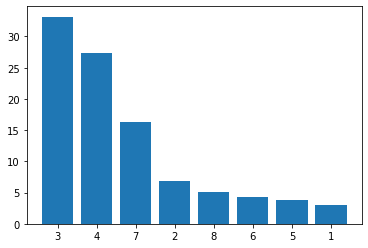

In [108]:
# Plot the gain as a bar chart

plt.bar(gain.index.astype(str), gain.values)

plt.show()

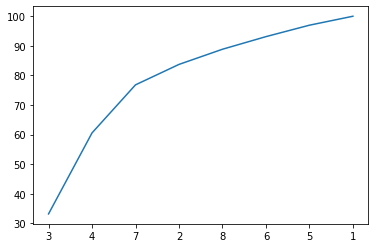

In [109]:
# Plot the cumulative gain as a line chart

plt.plot(cum_gain.index.astype(str), cum_gain.values)

plt.show()

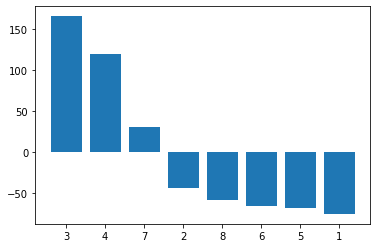

In [110]:
# Plot the lift as a bar chart

plt.bar(lift.index.astype(str), lift.values)

plt.show()

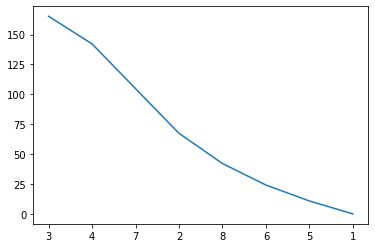

In [111]:
# Plot the cumulative lift as a line chart

plt.plot(cum_lift.index.astype(str), cum_lift.values)

plt.show()